<a href="https://colab.research.google.com/github/israel-12/Analyse_des_sentiments_sur_les_produits/blob/main/Analyse_des_sentiments_sur_les_produits_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importation des librairies et base de données**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [ ]:
df = pd.read_csv("dataset.csv")

## **Exploration des données**

>Nous allons afficher les premières lignes du dataframe pour vérifier que les données sont correctement chargées :



In [ ]:
df.head()

,Id_Commentaire,Commentaires,Sentiments
0,1,"J'adore ce produit, il est incroyable !",+
1,2,"Super achat, je le recommande vivement.",+
2,3,Vous êtes vraiment cool !,+
3,4,Ce produit répond parfaitement à mes attentes.,+
4,5,Je suis impressionné par la qualité de cet art...,+


Nous pouvons vérifier aussi les informations sur les colonnes, les types de données et les statistiques récapitulatives :


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id_Commentaire  100 non-null    int64 
 1   Commentaires    100 non-null    object
 2   Sentiments      100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
df.describe()

,Id_Commentaire
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


## **Le netoyage de notre dataframe**

Dans cette étape, nous allons nettoyer les données pour éliminer les éventuels problèmes tels que les valeurs manquantes, les caractères indésirables, etc.
Supprimer les lignes avec des valeurs manquantes si cela existe :


In [ ]:
#Suppression de la colonne id_commentaire qui n'est d'aucune importance

del df["Id_Commentaire"]

In [ ]:
#Nous verifions s'il y a des valeurs null dans notre dataframe
df.isnull()

,Commentaires,Sentiments
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
95,False,False
96,False,False
97,False,False
98,False,False


Conversion de tous les commentaire en minuscule

In [ ]:
#Conversion des commentaires en miniscules
df['Commentaires'] = df['Commentaires'].str.lower()
df

,Commentaires,Sentiments
0,"j'adore ce produit, il est incroyable !",+
1,"super achat, je le recommande vivement.",+
2,vous êtes vraiment cool !,+
3,ce produit répond parfaitement à mes attentes.,+
4,je suis impressionné par la qualité de cet art...,+
...,...,...
95,le service client est peu aimable et n'a pas r...,-
96,j'ai reçu un produit défectueux et le retour a...,-
97,la livraison a été retardée sans aucune commun...,-
98,"ce produit est cher pour ce qu'il offre, je ne...",-


## **Conversion des sentiments en valeurs numériques :**
Dans cette étape, nous allons convertir les sentiments représentés par "+/-" en valeurs numériques, par exemple, "1" pour les sentiments positifs et "0" pour les sentiments négatifs.

In [ ]:
df['Sentiments'] = df['Sentiments'].apply(lambda x: 1 if x == '+' else 0)

In [ ]:
df

,Commentaires,Sentiments
0,"j'adore ce produit, il est incroyable !",1
1,"super achat, je le recommande vivement.",1
2,vous êtes vraiment cool !,1
3,ce produit répond parfaitement à mes attentes.,1
4,je suis impressionné par la qualité de cet art...,1
...,...,...
95,le service client est peu aimable et n'a pas r...,0
96,j'ai reçu un produit défectueux et le retour a...,0
97,la livraison a été retardée sans aucune commun...,0
98,"ce produit est cher pour ce qu'il offre, je ne...",0


**Nous faisons une copie de df dans df_ok**

In [ ]:
df_ok = df

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


stopwords_fr = set(stopwords.words('french'))
lemmatiser = WordNetLemmatizer()

def tokenisation_lemmatisation(mot):
    # Tokenisation
    tokens = word_tokenize(mot)

    # Suppression des mots vides
    tokens = [token for token in tokens if token.lower() not in stopwords_fr]

    # Lemmatisation
    tokens = [lemmatiser.lemmatize(token) for token in tokens]

    # Retourner le texte prétraité
    return ' '.join(tokens)

# Appliquer la fonction de prétraitement à la colonne 'Commentaires' du DataFrame
df_ok['Commentaires'] = df_ok['Commentaires'].apply(tokenisation_lemmatisation)


In [ ]:
df_ok['Commentaires']

0                        j'adore produit , incroyable !
1                   super achat , recommande vivement .
2                                       vraiment cool !
3                produit répond parfaitement attentes .
4                    impressionné qualité cet article .
                            ...                        
95     service client peu aimable ' a résolu problème .
96    j'ai reçu produit défectueux retour a compliqué .
97    livraison a retardée sans aucune communication...
98              produit cher qu'il offre , recommande .
99                                      vraiment cool !
Name: Commentaires, Length: 100, dtype: object

## **Données d'entrainement**

> Nous allons subdiviser l'ensemble des données en données d'entrainement (80%) et en données de test (20%)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_ok['Commentaires']  # Variables indépendantes (commentaires)
y = df_ok['Sentiments']    # Variable cible (sentiments)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#Nous verifions la taille de nos données d'entrainement et de test
print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de test :", len(X_test))

Taille de l'ensemble d'entraînement : 80
Taille de l'ensemble de test : 20


## Modèle de classification: cas de l'algorithme de KNN
Nous allons créer un modèle de classification en utilisant l'algorithme des k plus proches voisins (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
#vectoriser les commentaires
valeur_vectorise = TfidfVectorizer()
X_train = valeur_vectorise.fit_transform(X_train) #le nouveau X_train
X_test = valeur_vectorise.transform(X_test) # le nouveau X_test


In [ ]:
#print(X_train)

In [ ]:
## modèle d'entrainement avec knn
## prenons 3 plus proches voisins c'est à dire k=3 pour entrainer notre modèle

k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# faisons une prédiction sur X_train_vectorized

y_pred = knn_model.predict(X_train)

#Impression du rapport
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.90      0.93      0.92        41

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



## **La matrice de confusion**

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
confusion_matrix = confusion_matrix(y_train,y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix)


Matrice de confusion :
[[35  4]
 [ 3 38]]


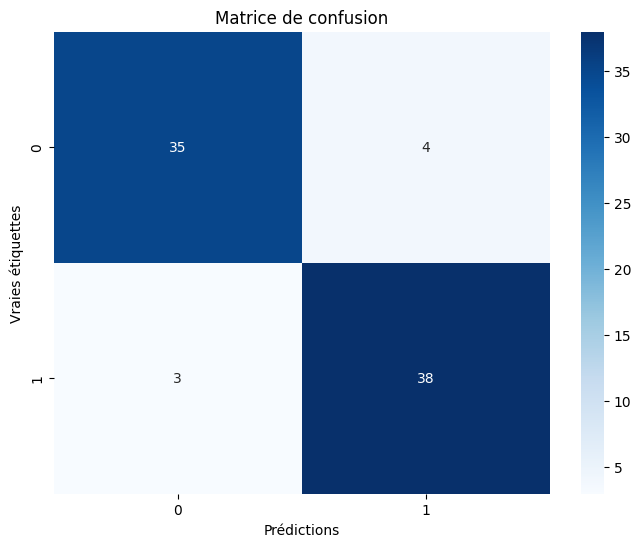

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()


## **utilis le modèle entrainé pour prédire les sentiments des commentaires non étiquettés suivant :**
- "ce produit est incroyable!" ;
- "Je suis déçu de mon achat";
- " Le service client est exceptionnel";
- "Vous êtes le meilleur"

In [ ]:
new_comments = ["ce produit est incroyable!",
               "Je suis déçu de mon achat",
               "Le service client est exceptionnel",
               "Vous etes le meilleur"]

cleaned_comments = [re.sub('[^a-zA-Z]', ' ', comment.lower()) for comment in new_comments]


In [ ]:
cleaned_comments

['ce produit est incroyable ',
 'je suis d  u de mon achat',
 'le service client est exceptionnel',
 'vous etes le meilleur']

In [ ]:
new_comments = valeur_vectorise.transform(cleaned_comments)
new_comments_predictions = knn_model.predict(new_comments)

print(new_comments_predictions)

[0 1 1 1]


In [ ]:
for comment, prediction in zip(new_comments, new_comments_predictions):
    sentiment = "Positif" if prediction == 1 else "Négatif"
    print(f"Commentaire : {comment}")
    print(f"Sentiment prédit : {sentiment}")


Commentaire :   (0, 140)	0.2815877329924005
  (0, 92)	0.8221214952872989
  (0, 65)	0.49479752991984144
Sentiment prédit : Négatif
Commentaire :   (0, 0)	1.0
Sentiment prédit : Positif
Commentaire :   (0, 174)	0.4322138449137709
  (0, 68)	0.6781015401134897
  (0, 65)	0.4081184703311315
  (0, 30)	0.4322138449137709
Sentiment prédit : Positif
Commentaire :   (0, 109)	1.0
Sentiment prédit : Positif
